   position             team  played   won  drawn  lost  goals_for  \
0         1      Real Madrid      30  24.0    4.0   2.0      0.089   
1         2  Atlético Madrid      30  17.0    6.0   7.0      0.057   
2         3         Zaragoza      30  12.0    9.0   9.0      0.054   
3         4        Barcelona      30  13.0    6.0  11.0      0.062   
4         5         Valencia      30  11.0   10.0   9.0      0.046   

   goals_against  goal_difference     points  year  
0          0.025            0.064  57.777778  1960  
1          0.035            0.022  44.444444  1960  
2          0.053            0.001  36.666667  1960  
3          0.047            0.015  35.555556  1960  
4          0.042            0.004  35.555556  1960  
(160, 11)
position             int64
team                object
played               int64
won                float64
drawn              float64
lost               float64
goals_for          float64
goals_against      float64
goal_difference    float64
points  

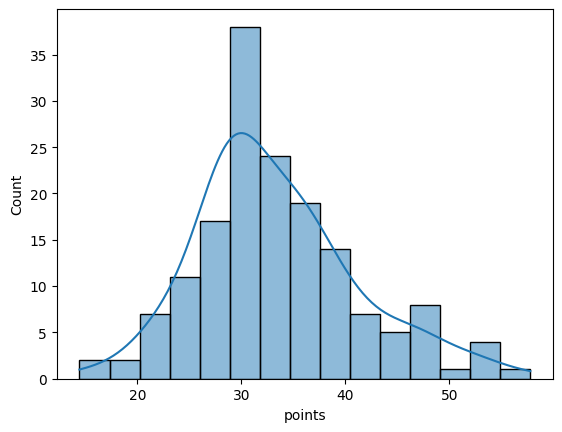

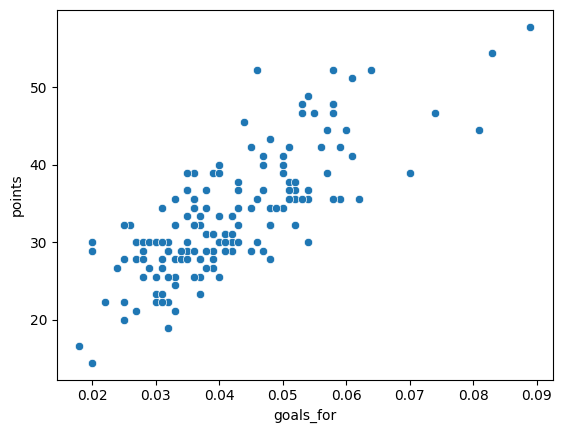

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
la_liga=pd.read_csv("../normalized_data/1960-1970.csv")



     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()




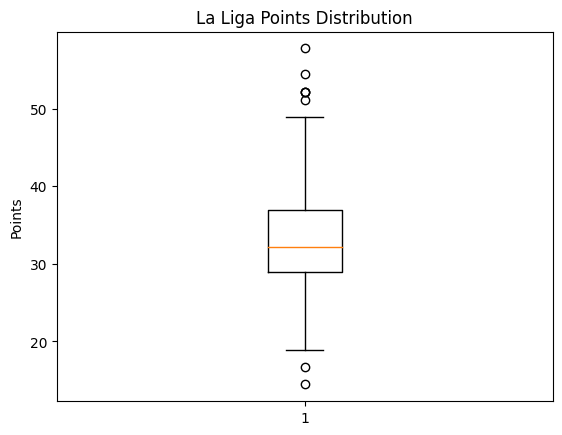

upper bound:  49.02777777777776
lower_bound:  16.80555555555557
Outliers:
     position                 team  played   won  drawn  lost  goals_for  \
0           1          Real Madrid      30  24.0    4.0   2.0      0.089   
32          1          Real Madrid      30  23.0    3.0   4.0      0.083   
48          1          Real Madrid      30  22.0    2.0   6.0      0.061   
64          1          Real Madrid      30  21.0    5.0   4.0      0.064   
79         16  Deportivo La Coruña      30   6.0    3.0  21.0      0.018   
96          1          Real Madrid      30  19.0    9.0   2.0      0.058   
128         1          Real Madrid      30  18.0   11.0   1.0      0.046   
159        16           Pontevedra      30   4.0    5.0  21.0      0.020   

     goals_against  goal_difference     points  year  
0            0.025            0.064  57.777778  1960  
32           0.033            0.050  54.444444  1962  
48           0.023            0.038  51.111111  1963  
64           0.018   

In [20]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')


plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print("upper bound: ",upper_bound)
print("lower_bound: ",lower_bound)

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

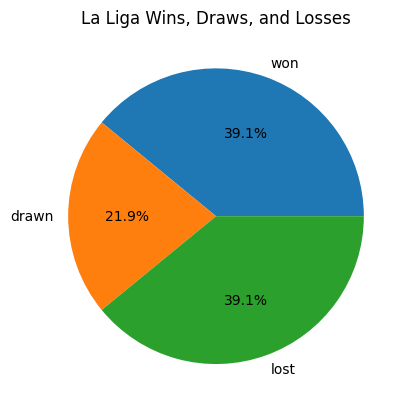

In [21]:
arr=[]
year1=1960
year2=1961
while(year1!=1970):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

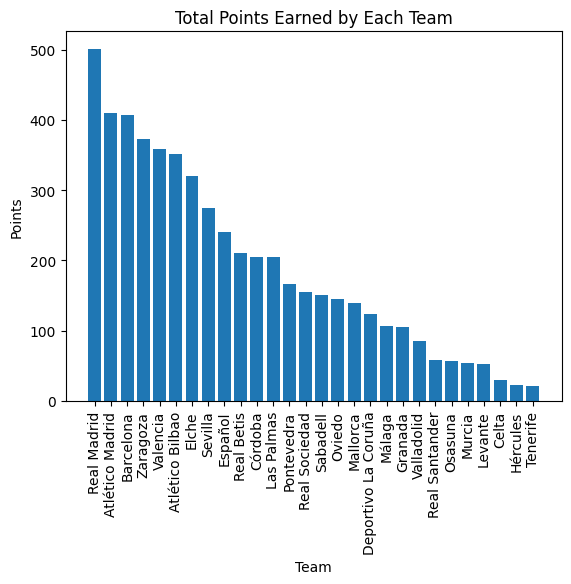

In [22]:
df=pd.read_csv("../normalized_data/1960-1970.csv")

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()

